In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

img_cols, img_rows = 28, 28
img_size = 28 * 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_size)
x_test = x_test.reshape(x_test.shape[0], img_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:{}, Test loss: {}, {}'.format(score[1], score[0], score))


(60000, 'train samples')
(10000, 'test samples')
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [=============

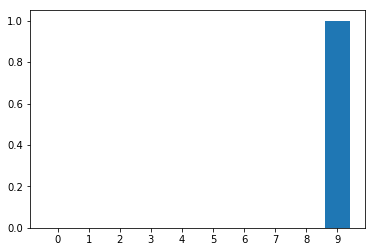

In [81]:
import matplotlib.pyplot as plt
import numpy as np

img_0 = x_test[7:8]
prediction = model.predict(img_0)

x_coordinates = np.arange(prediction.shape[1])

plt.bar(x_coordinates, prediction[0][:])
plt.xticks(x_coordinates, np.arange(10))
plt.show()

In [88]:
img_0.shape

(1, 784)